In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [2]:
file_path = "C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train"
file_path2 = "C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Test"


In [3]:
name_class = os.listdir(file_path)
name_class

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [11]:
filepaths

['C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0025780.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0025803.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0025825.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0025953.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0025957.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0025992.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0026040.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0026149.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0026171.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\sk_dataset\\Train\\actinic keratosis\\ISIC_0026194.jpg',
 'C:\\Users\\gbhar\\OneDrive\\Desktop\\s

In [12]:
 labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))

In [13]:
labels

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [14]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,Filepath,Label
0,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,nevus
1,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,melanoma
2,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,nevus
3,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,pigmented benign keratosis
4,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,squamous cell carcinoma
5,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,basal cell carcinoma
6,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,basal cell carcinoma
7,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,melanoma
8,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,basal cell carcinoma
9,C:\Users\gbhar\OneDrive\Desktop\sk_dataset\Tra...,seborrheic keratosis


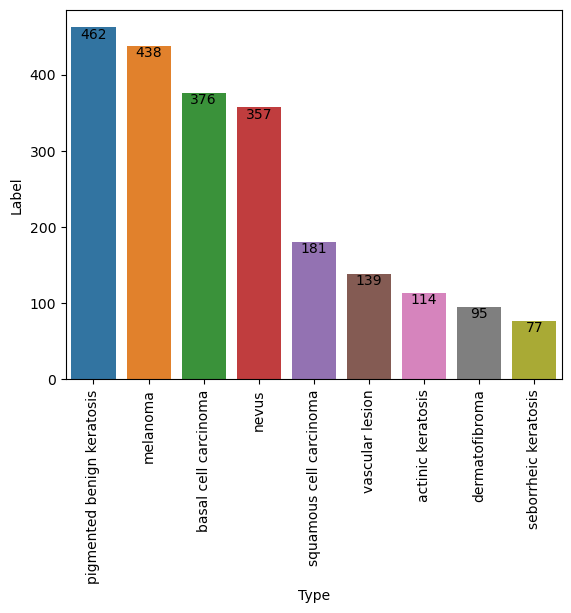

In [15]:
# Get the counts of each category
counts = data['Label'].value_counts()

# Create the bar plot
sns.barplot(x=counts.index, y=counts)

# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='top')

# Set labels and rotate x-axis labels
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.show()

In [16]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

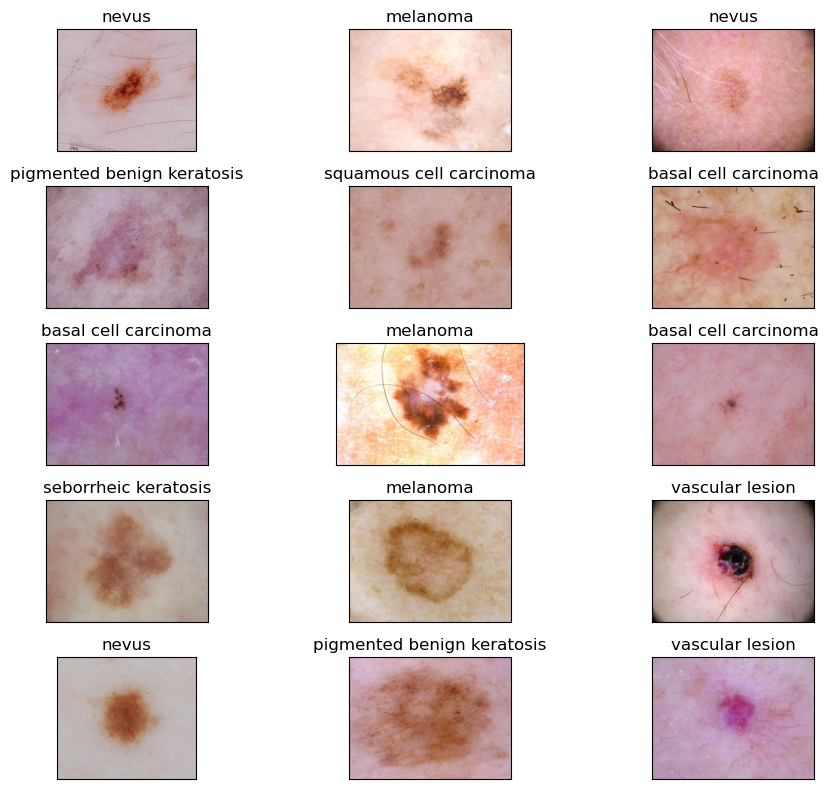

In [17]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})

# Iterate over the axes and plot images
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))  # Assuming data has 'Filepath' column with image paths
    ax.set_title(data.Label[i])  # Assuming data has 'Label' column with corresponding labels

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [18]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [19]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)





Found 1679 validated image filenames belonging to 9 classes.
Found 560 validated image filenames belonging to 9 classes.
Found 560 validated image filenames belonging to 9 classes.


In [20]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [21]:
inputs = pretrained_model.inputs

x = Dense(128, activation= 'relu')(pretrained_model.output)
x = Dense(128, activation= 'relu')(x)

outputs = Dense(9, activation = 'softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [22]:
model.compile(
    optimizer='adam',  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [23]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [24]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10


C:\Users\gbhar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.3447 - loss: 1.8531 - val_accuracy: 0.4929 - val_loss: 1.4896
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5846 - loss: 1.1801 - val_accuracy: 0.5875 - val_loss: 1.2089
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6581 - loss: 0.9198 - val_accuracy: 0.5804 - val_loss: 1.1769
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7263 - loss: 0.7816 - val_accuracy: 0.6036 - val_loss: 1.2288
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7588 - loss: 0.7030 - val_accuracy: 0.6286 - val_loss: 1.2052
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7795 - loss: 0.5972 - val_accuracy: 0.6250 - val_loss: 1.2083
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8298 - loss: 0.4699 - val_accuracy: 0.5911 - val_loss: 1.2348
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8536 - loss: 0.3900 - val_accuracy: 0.6018 - val_loss: 1.3372
Epo

In [25]:
model.save("model_resnet50.h5")

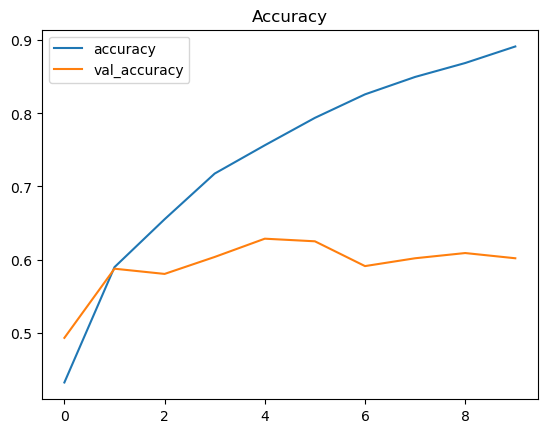

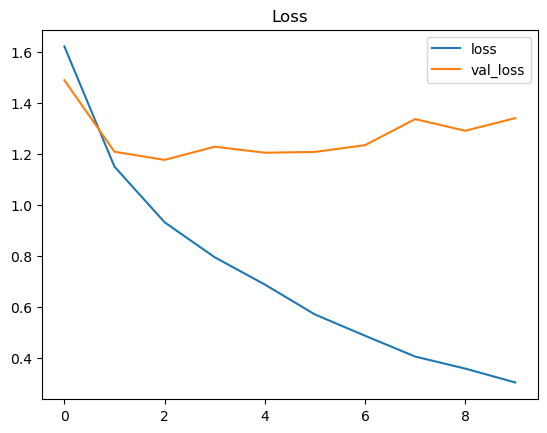

In [26]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [28]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


C:\Users\gbhar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 1.34094
Test Accuracy: 60.18%


In [29]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]



18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


In [30]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.27      0.14      0.19        28
      basal cell carcinoma       0.65      0.74      0.69        96
            dermatofibroma       0.43      0.50      0.46        12
                  melanoma       0.65      0.60      0.63       120
                     nevus       0.49      0.68      0.57        91
pigmented benign keratosis       0.70      0.76      0.73       118
      seborrheic keratosis       0.00      0.00      0.00        18
   squamous cell carcinoma       0.57      0.18      0.27        45
           vascular lesion       0.71      0.75      0.73        32

                  accuracy                           0.60       560
                 macro avg       0.50      0.48      0.47       560
              weighted avg       0.59      0.60      0.58       560



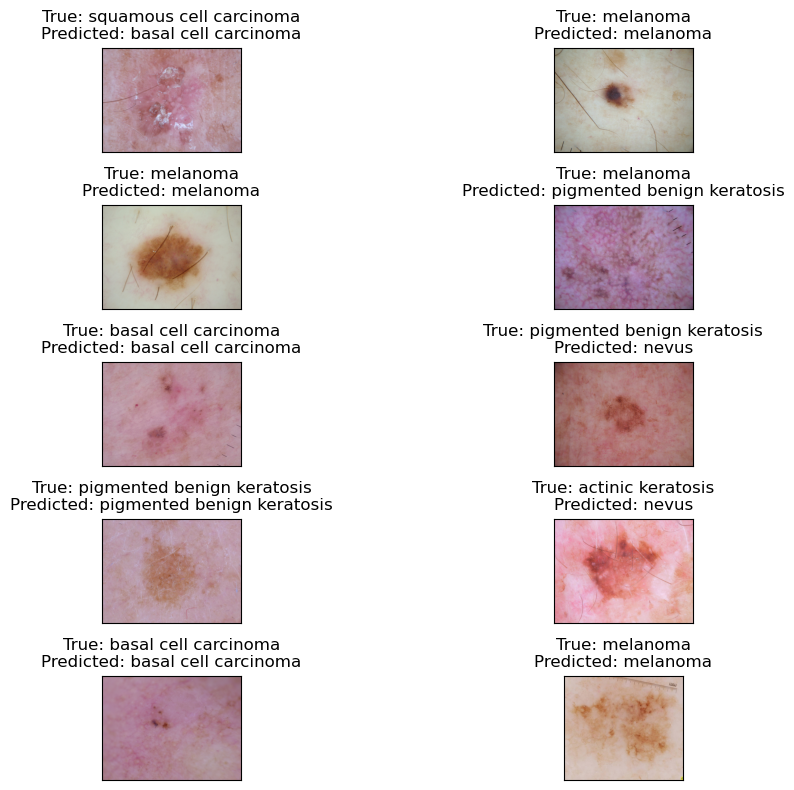

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [36]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 3.3 MB/s eta 0:00:12
   ---------------------------------------- 0.4/38.6 MB 4.6 MB/s eta 0:00:09
    --------------------------------------- 0.7/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.4/38.6 MB 8.7 MB/s eta 0:00:05
   -- ------------------------------------- 2.5/38.6 MB 11.5 MB/s eta 0:00:04
   --- ------------------------------------ 3.6/38.6 MB 13.6 MB/s eta 0:00:03
   ---- ----------------------------------- 4.5/38.6 MB 15.2 MB/s eta 0:00:03
   ------ --------------------------------- 6.0/38.6 MB 16.8 MB/s eta 0:00:02
   ------- -------------------------------- 6.9/38.6 MB 17.7 MB/s eta 0:00:02
   --------

In [37]:
import cv2
import numpy as np
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load and preprocess the image
img_path = "C:/Users/gbhar/OneDrive/Desktop/sk_dataset/Train/actinic keratosis/ISIC_0025780.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

# Make predictions
result = model.predict(x)
print((result * 100).astype('int'))



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[ 3  0  0  0 31 54  0  0  9]]


In [45]:
from tensorflow.keras.models import load_model
loaded_model_imagenet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [55]:
import cv2
import numpy as np

# Load and preprocess the image
img_path = "C:/Users/gbhar/OneDrive/Desktop/sk_dataset/Train/actinic keratosis/ISIC_0025780.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))  # Resize the image to match the model's input shape
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = loaded_model_imagenet.predict(x)

# Map class indices to class labels
class_labels = ["class1", "class2", "class3", "class4", "class5", "class6", "class7", "class8", "class9"]

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the corresponding class label
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted class: class6


In [56]:
import matplotlib.pyplot as plt


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[ 3  0  0  0 31 54  0  0  9]]


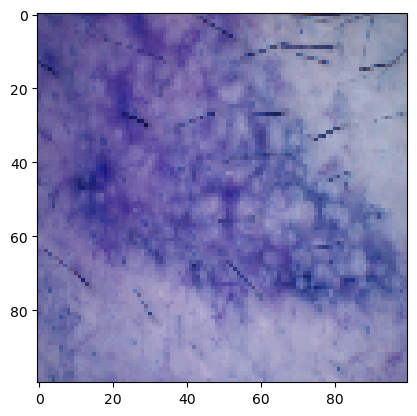

In [58]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model_imageNet = load_model("model_resnet50.h5")

# Load and preprocess the image
img_path = "C:/Users/gbhar/OneDrive/Desktop/sk_dataset/Train/actinic keratosis/ISIC_0025780.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))  # Resize the image to match the model's input shape
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

# Make predictions
result = loaded_model_imageNet.predict(x)

# Print the results
print((result*100).astype('int'))

# Display the image
plt.imshow(img)



In [59]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[3, 0, 0, 0, 31, 54, 0, 0, 9]


In [60]:
print("Largest element is:", max(pp))


Largest element is: 54


In [54]:
index = pp.index(max(pp))

In [61]:
name_class[index]

'pigmented benign keratosis'

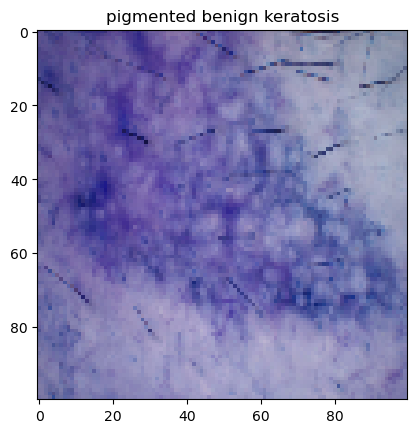

In [62]:
plt.title(name_class[index])
plt.imshow(img)